# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [11]:
# import numpy, matplotlib and 3d plots.
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

# Import the model class.
import inauguralproject

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

I solve the model by looping over the proposed alpha and sigma values and finding (by using the built in model solver), the optimal allocation of work.

In [12]:
# I define the different alpha and sigma values i want to solve the model at.
a_variations = [0.25, 0.5, 0.75]
s_variations = [0.5, 1, 1.5]

# I create an empty array to be filled with value of alpha and sigma and and the female to male home work ratio.
cordinates = np.zeros(shape=(9,3))

# I create three lists to later create plots of alpha, sigma and the female to male home work ratio.
alpha_cor = []
sigma_cor = []
hf_hm_cor = []
# I definer j, a count variable.
j = 0

# For every combination of the sigma and alpha values i solve the model using the built in model class functions.
for a in a_variations:
        for s in s_variations:
                # the model is defined with the particular alpha and sigma values in place.
                model = inauguralproject.HouseholdSpecializationModelClass(a,s)

                # the model is sovled
                optimum = model.solve_discrete()
                optimum.utility = model.calc_utility(optimum.LM, optimum.HM, optimum.LF, optimum.HF)

                # The relevant model values are stored. 
                cordinates[j]   = [a, s, optimum.HF/optimum.HM]
                alpha_cor.append(a)
                sigma_cor.append(s)
                hf_hm_cor.append(optimum.HF/optimum.HM)

                # the count variable is updated.
                j = j +1

c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


And plot the result.

At the alpha value of: 0.2, and the sigma value of: 0.5, the female to male home work ratio is: 0.545
At the alpha value of: 0.2, and the sigma value of: 1.0, the female to male home work ratio is: 0.308
At the alpha value of: 0.2, and the sigma value of: 1.5, the female to male home work ratio is: 0.214
At the alpha value of: 0.5, and the sigma value of: 0.5, the female to male home work ratio is: 1.000
At the alpha value of: 0.5, and the sigma value of: 1.0, the female to male home work ratio is: 1.000
At the alpha value of: 0.5, and the sigma value of: 1.5, the female to male home work ratio is: 1.000
At the alpha value of: 0.8, and the sigma value of: 0.5, the female to male home work ratio is: 1.833
At the alpha value of: 0.8, and the sigma value of: 1.0, the female to male home work ratio is: 3.250
At the alpha value of: 0.8, and the sigma value of: 1.5, the female to male home work ratio is: 4.667


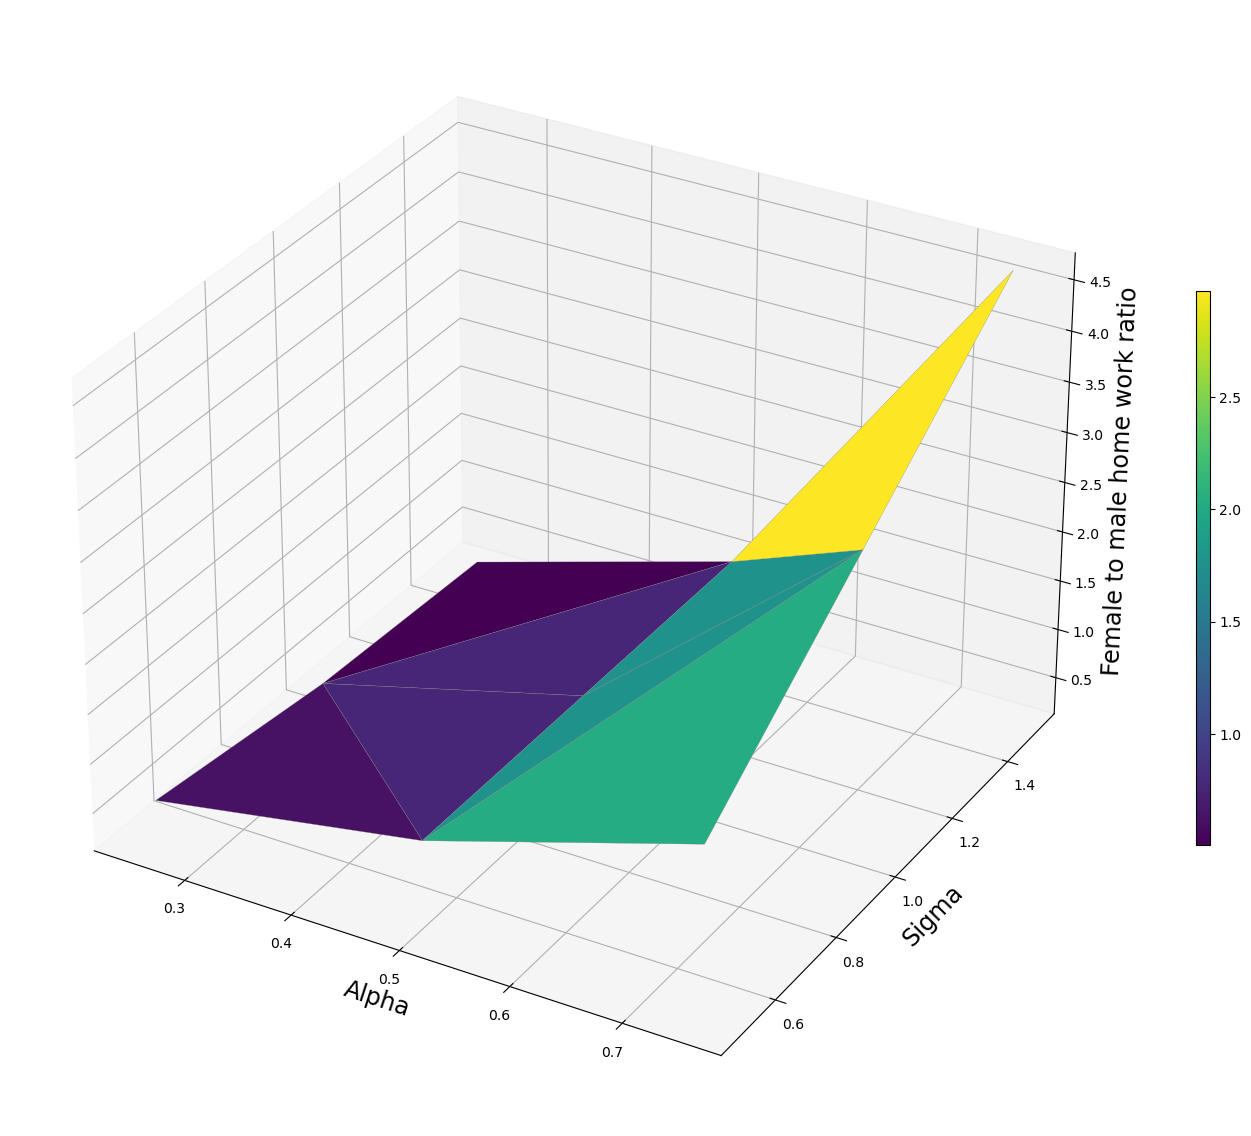

In [13]:
# The results in words, using the cordinates array.
for i in range(0, 9):
        print(f'At the alpha value of: {cordinates[i,0]:<.1f}, and the sigma value of: {cordinates[i,1]:<.1f}, the female to male home work ratio is: {cordinates[i,2]:<1.3f}')

# The results illustrated in a figure, using the three cordinate lists
fig=plt.figure(figsize =(18, 18))
ax=fig.add_subplot(111, projection='3d')

#scatter plot
#ax.scatter(alpha_cor, sigma_cor, hf_hm_cor, alpha=1)

# boxplot
#bottom = np.zeros_like(hf_hm_cor)
#width = depth = 1
#ax.bar3d(alpha_cor, sigma_cor, bottom, width, depth, hf_hm_cor, shade=True)

#surface plot
my_cmap = plt.get_cmap()
trisurf = ax.plot_trisurf(alpha_cor, sigma_cor, hf_hm_cor, cmap=my_cmap, linewidth=0.2, antialiased=True, edgecolor = 'grey')
fig.colorbar(trisurf, ax = ax, shrink = 0.4, aspect = 40)
ax.set_xlabel('Alpha', size='xx-large')
ax.set_ylabel('Sigma', size='xx-large')
ax.set_zlabel('Female to male home work ratio', size='xx-large')
plt.show(block=False)

# Question 2

I solve the mode by looping over the proposed female wages and solving for the optimal allocation of work hours.

In [14]:
# I define the different female wages i want to solve the model at.
wf_variations = [0.8,0.9,1.0,1.1,1.2]

# I create an empty array to be filled with value of the log of the female to male wage ratio and the corresponding log of female to male home work.
cordinates = np.zeros(shape=(5,2))
# a list for each of the variables i want to plot.
l_wf_wm_cor = []
l_hf_hm_cor = []
# A count variable, j, used for indexing in the array.
j = 0

# For every wage i solve the model using the built in model class functions.
for wf in wf_variations:
        # The model is defined
        model = inauguralproject.HouseholdSpecializationModelClass(wF=wf)

        # ... and solved
        optimum = model.solve_discrete()
        optimum.utility = model.calc_utility(optimum.LM, optimum.HM, optimum.LF, optimum.HF)

        # The values are saved
        cordinates[j]   = [np.log(wf), np.log(optimum.HF/optimum.HM)]
        l_wf_wm_cor.append(np.log(wf))
        l_hf_hm_cor.append(np.log(optimum.HF/optimum.HM))
        
        # ... and the count variable is updated
        j = j +1



And plot the result

at Log(wf/wm) :-0.2, the log(Hf/Hm) is: 0.2
at Log(wf/wm) :-0.1, the log(Hf/Hm) is: 0.0
at Log(wf/wm) :0.0, the log(Hf/Hm) is: 0.0
at Log(wf/wm) :0.1, the log(Hf/Hm) is: -0.1
at Log(wf/wm) :0.2, the log(Hf/Hm) is: -0.2


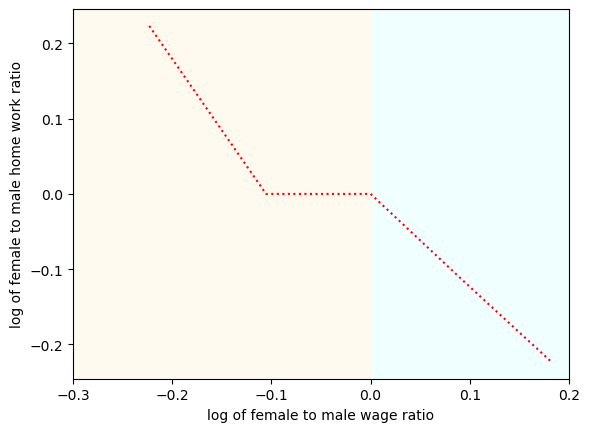

In [15]:
# The results in words, using the cordinates array.
for i in range(0, 5):
        print(f'at Log(wf/wm) :{cordinates[i,0]:<.1f}, the log(Hf/Hm) is: {cordinates[i,1]:<.1f}')

# the values in a plot
plt.plot(l_wf_wm_cor, l_hf_hm_cor, linestyle = 'dotted', color='r')
plt.xlim([-0.3,0.2])
plt.axvspan(-0.3,0, facecolor='floralwhite')
plt.axvspan(0,0.2, facecolor='azure')
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()

# Question 3

I solve the model by looping over the proposed female wages and using the builtin functions find the optimal allocation of work hours.

In [28]:
# I define the different female wages i want to solve the model at.
wf_variations = [0.8,0.9,1.0,1.1,1.2]

# I create an empty array to be filled with value of the log of the female to male wage ratio and the corresponding log of female to male home work.
cordinates_2 = np.zeros(shape=(len(wf_variations),2))
# a list for each of the variables i want to plot.
l_wf_wm_cor_2 = []
l_hf_hm_cor_2 = []
# A count variable, j, used for indexing in the array.
j = 0

# For every wage i solve the model using the built in model class functions.
for wf in wf_variations:
    # The model is defined ...
    model   = inauguralproject.HouseholdSpecializationModelClass(wF=wf)

    # solved ...
    optimum = model.solve()

    # saved ...
    cordinates_2[j]   = [np.log(wf), np.log(optimum.x[3]/optimum.x[1])]
    l_wf_wm_cor_2.append(np.log(wf))
    l_hf_hm_cor_2.append(np.log(optimum.x[3]/optimum.x[1]))

    # and the count variable is updated.
    j = j +1


And plot the result.

at Log(wf/wm) :-0.2, the log(Hf/Hm) is: 0.2206
at Log(wf/wm) :-0.1, the log(Hf/Hm) is: 0.0010
at Log(wf/wm) :0.0, the log(Hf/Hm) is: 0.0000
at Log(wf/wm) :0.1, the log(Hf/Hm) is: -0.0009
at Log(wf/wm) :0.2, the log(Hf/Hm) is: -0.0017


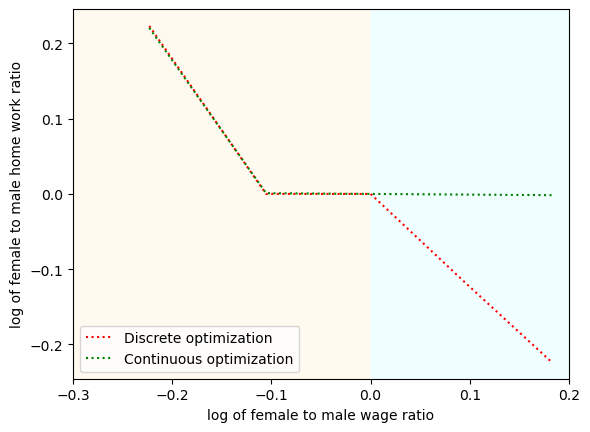

In [17]:
# The results in words, using the cordinates array.
for i in range(0, 5):
        print(f'at Log(wf/wm) :{cordinates_2[i,0]:<.1f}, the log(Hf/Hm) is: {cordinates_2[i,1]:<.4f}')

# the values in a plot
plt.plot(l_wf_wm_cor, l_hf_hm_cor, linestyle = 'dotted', color='r', label="Discrete optimization")
plt.plot(l_wf_wm_cor_2, l_hf_hm_cor_2, linestyle = 'dotted', color='g', label="Continuous optimization")
plt.legend()
plt.xlim([-0.3,0.2])
plt.axvspan(-0.3,0, facecolor='floralwhite')
plt.axvspan(0,0.2, facecolor='azure')
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()


# Question 4


I solve the model using my own model class functions.

In [26]:
# I define a model for the model class
model   = inauguralproject.HouseholdSpecializationModelClass()

# I solve the model using the estimate function
res     = model.estimate()

# Which produce the alpha and sigma values that best solves the model as to arrive at the predetermined beta values from Siminski and Yetsenga (2022).
print(f'I find the optimal value of alpha to be: {res.x[0]:<.1f}')
print(f'I find the optimal value of sigma to be: {res.x[1]:<.1f}')



I find the optimal value of alpha to be: 0.6
I find the optimal value of sigma to be: 0.5


I plot the models solution and my OLS approximation.

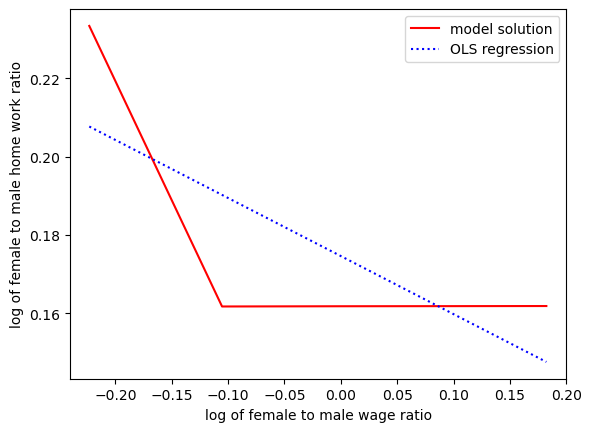

In [27]:
# I plot using the estimated alpha and sigma together with the beta0 and beta1

# I calculated the log of female to male home work ratio for given female wages, at the solution alpha and sigma values
hf_wf       = model.solve_wF_vec(alpha=res.x[0], sigma=res.x[1])
# I find the optimal beta values at the solution sigma and alpha values.
betas       = model.run_regression(a=res.x[0], s=res.x[1])
# I predict the female to male home work ratio according to the optimal beta values.
y_vals = betas[0] + betas[1]*hf_wf[1]


# Now the model solution and the OLS solution can be plotted together.
plt.plot(hf_wf[1], hf_wf[0], linestyle = 'solid', color='r', label="model solution")
plt.plot(hf_wf[1], y_vals, linestyle = 'dotted', color='b', label="OLS regression")
plt.legend()
plt.xlim([-0.24,0.2])
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()


# Question 5


I found that the alpha value tha best fit the relationship found in Siminski and Yetsenga (2022) was 0.6. 
As such the current model overestimates the relative productivity of women compared to men when producing the home good. This is a result of the model finding to large female to male home work ratios, which the simple model can only explain as a difference in men and womens home productivity. 

By introducing another reason for the descrepency between men and womens work allocation that increases womens and/or decreases mens homw work allocation, we can create a model that fits the Yetsenga result and still has an alpha value of 0.5. 

maybe women are restricted in the amount of work time the can have

In [24]:
# Import the model class.
import inauguralproject

# i define a new model using my own new model class, which includes a restriction on female labor hours
new_model = inauguralproject.NewModelClass()

# I solve the model using the estimate function
res_new     = new_model.estimate()

# Which produce the alpha and sigma values that best solves the model as to arrive at the predetermined beta values from Siminski and Yetsenga (2022).
print(f'I find the optimal value of alpha to be: {res_new.x[0]:<.1f}')
print(f'I find the optimal value of sigma to be: {res_new.x[1]:<.1f}')

c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:250: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)*par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:250: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)*par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:250: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)*par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


I find the optimal value of alpha to be: 1.0
I find the optimal value of sigma to be: 0.1


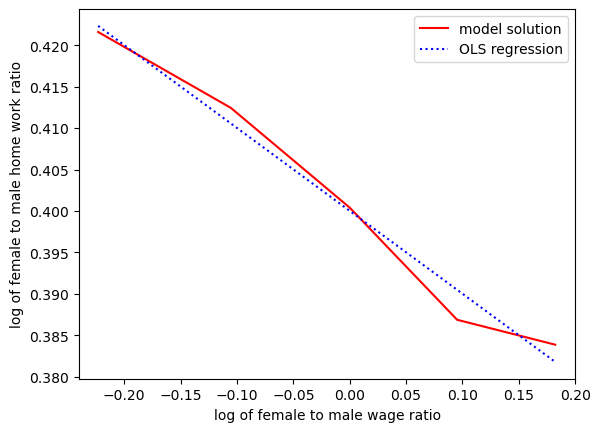

In [25]:
# I plot using the estimated alpha and sigma together with the beta0 and beta1

# I calculated the log of female to male home work ratio for given female wages, at the solution alpha and sigma values
hf_wf       = new_model.solve_wF_vec(alpha=res_new.x[0], sigma=res_new.x[1])
# I find the optimal beta values at the solution sigma and alpha values.
betas       = new_model.run_regression(a=res_new.x[0], s=res_new.x[1])
# I predict the female to male home work ratio according to the optimal beta values.
y_vals = betas[0] + betas[1]*hf_wf[1]


# Now the model solution and the OLS solution can be plotted together.
plt.plot(hf_wf[1], hf_wf[0], linestyle = 'solid', color='r', label="model solution")
plt.plot(hf_wf[1], y_vals, linestyle = 'dotted', color='b', label="OLS regression")
plt.legend()
plt.xlim([-0.24,0.2])
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()
